<h1>Emotion Detection in text using ML <h1>

In [1]:
# Load Packages
import pandas as pd
import numpy as np

In [2]:
# Load Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load text cleaning package
import neattext.functions as nfx

In [4]:
# Load dataset
df = pd.read_csv("data/emotion_dataset.csv")

In [5]:
# Preview the dataset
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [6]:
# Value count of the emotions in the dataset
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<AxesSubplot:xlabel='Emotion', ylabel='count'>

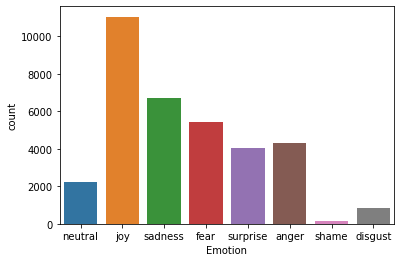

In [7]:
# Using seaborn to plot
sns.countplot(x='Emotion', data=df)

### Exploration

+ Text Cleaning
+ Sentiment Analysis
+ Keyword Extraction
    - Keywords for each emotion
    - Wordcloud

In [8]:
# Sentiment Analysis
from textblob import TextBlob

In [9]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    
    if sentiment > 0:
        result = "Positive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
        
    return result

In [10]:
# Checking sentiment of the dataset
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [11]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [12]:
# Compare our Emotion vs Sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

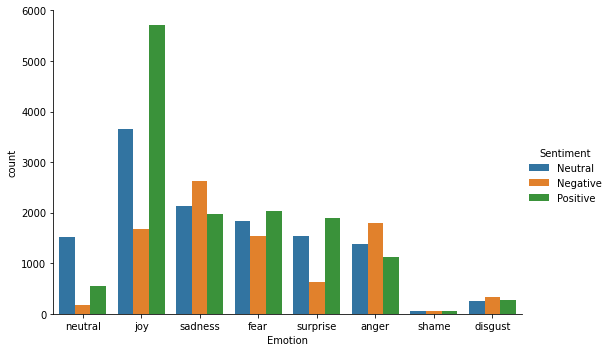

In [13]:
#  Plotting the result from the sentiment analysis
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', aspect=1.5)

### Text Cleaning
+ Remove noise
    - Stopwords
    - Special characters
    - punctuations
    - emojis

In [14]:
df['Clean_text'] = df['Text'].apply(nfx.remove_stopwords)

In [15]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_userhandles)

In [16]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_punctuations)

In [17]:
df['Clean_text'] = df['Clean_text'].apply(nfx.remove_special_characters)

In [18]:
df[['Text', 'Clean_text']]

,Text,Clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY Losing YOU


### Keyword Extraction
+ Extract most common words per class of motion

In [19]:
from collections import Counter

In [20]:
def extract_keywords(text, num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    
    return dict(most_common_tokens)

In [21]:
# List of emotions
emotion_list = df['Emotion'].unique().tolist()

In [22]:
joy_list = df[df['Emotion'] == 'joy']['Clean_text'].tolist()

In [23]:
# Joy document(All sentences as one paragraph)
joy_docs = ' '.join(joy_list)

In [24]:
# Extract Keywords
keyword_joy = extract_keywords(joy_docs)

In [25]:
keyword_joy

{'day': 733,
 'amp': 679,
 'time': 604,
 'Im': 559,
 'work': 516,
 'today': 480,
 'like': 478,
 'tomorrow': 470,
 'Christmas': 461,
 'love': 452,
 'happy': 378,
 'good': 347,
 'night': 338,
 'got': 328,
 'going': 304,
 'home': 303,
 'school': 300,
 'morning': 290,
 'joy': 289,
 '2': 267,
 'life': 262,
 'hours': 252,
 'week': 234,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 206,
 'me': 205,
 'long': 204,
 'people': 203,
 'family': 202,
 'great': 198,
 'sleep': 187,
 'God': 186,
 's': 184,
 'new': 182,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'RT': 166,
 'cant': 165,
 'it': 165,
 'friends': 161,
 'feeling': 159,
 'christmas': 150,
 'think': 148,
 'excited': 147,
 'right': 142,
 'class': 141}

In [26]:
# plot function for common words
def plot_most_common_words(mydict):
    df_1 = pd.DataFrame(mydict.items(), columns=['token', 'count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token', y='count', data=df_1)
    plt.xticks(rotation=45)
    plt.show()

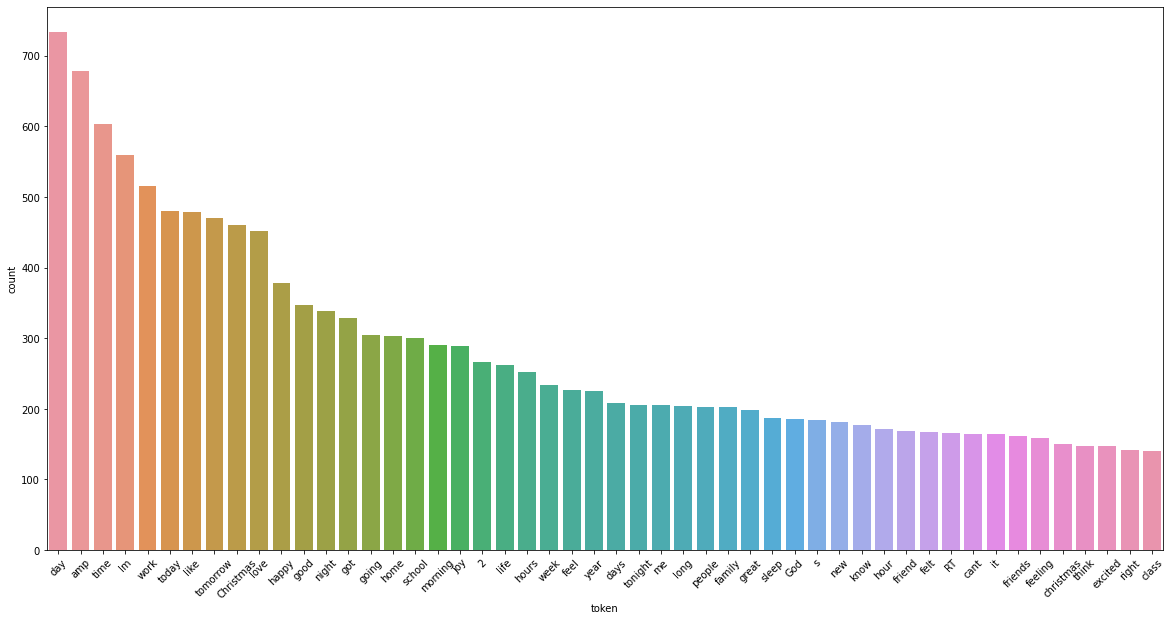

In [27]:
plot_most_common_words(keyword_joy)

In [28]:
# Word cloud
from wordcloud import WordCloud

In [29]:
def plot_wordcloud(docs):
    mywordcloud = WordCloud().generate(docs)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

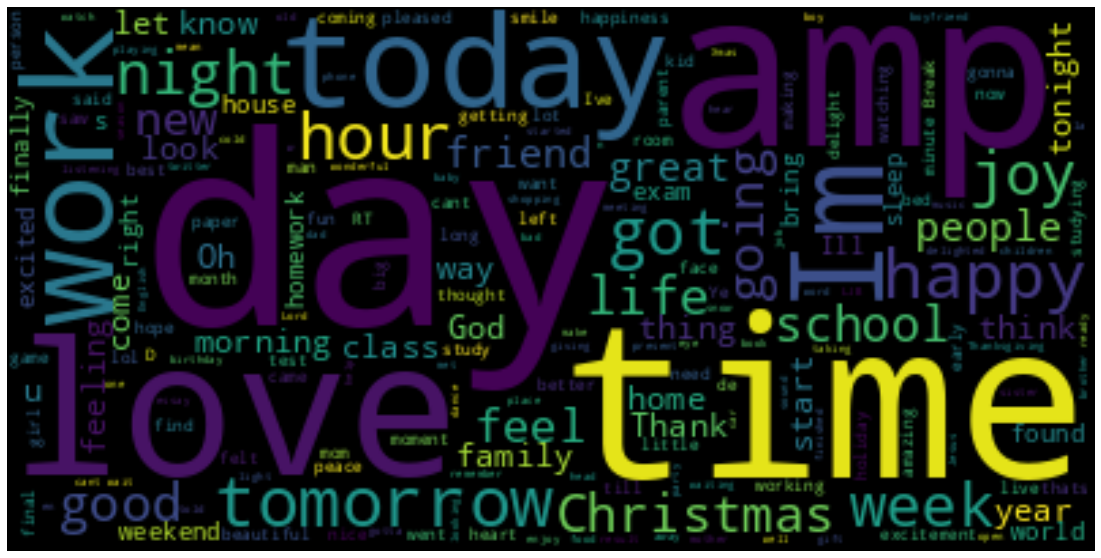

In [30]:
plot_wordcloud(joy_docs)

### Machine learning algorithms which can be used

+ Naive Bayes
+ Logistic Regression
+ KNN
+ Decision Tree

### Compare with SparkNLP/ NLU John Snows Lab

In [31]:
# Load ML packages
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [32]:
# Splitting dataset
from sklearn.model_selection import train_test_split

### Build Features from our Text

In [33]:
Xfeatures = df['Clean_text']
ylabels = df['Emotion']

In [34]:
# Vectorizing string data
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [35]:
cv.get_feature_names()

['00',
 '000',
 '000me',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '0945',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '100xawhy',
 '101',
 '1010',
 '1011',
 '1015',
 '1017',
 '101quot',
 '102',
 '1020',
 '1022',
 '102911',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '1031',
 '1035',
 '10373629',
 '1039',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1104',
 '110kmh',
 '111',
 '1111',
 '11110',
 '1111me',
 '112',
 '1129',
 '1130',
 '113011',
 '114',
 '1143yeah',
 '1146',
 '115',
 '1162',
 '1185',
 '11920',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '1201',
 '121',
 '121212',
 '1216',
 '121

In [36]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

<h3> Build Our Model <h3>

In [37]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [38]:
# Accuracy - Method 1
nb_model.score(X_test, y_test)

0.5645717570415788

In [39]:
# Predictions
y_pred_for_nb =nb_model.predict(X_test)

In [40]:
y_pred_for_nb

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

### Make a Single Prediction

+ Vectorized our text
+ Applied our model

In [41]:
sample_text = ["I love machine learning very much"]

In [43]:
vect = cv.transform(sample_text).toarray()

In [44]:
# Make prediction
nb_model.predict(vect)

array(['joy'], dtype='<U8')

In [45]:
# Checkfor Prediction prob/ Confidence score
nb_model.predict_proba(vect)

array([[2.25001586e-02, 9.76483429e-05, 9.88404143e-02, 8.15953359e-01,
        1.06414016e-03, 4.11439233e-02, 8.14619566e-07, 2.03995419e-02]])

In [46]:
# Get all classes for our model
nb_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [47]:
np.max(nb_model.predict_proba(vect)) 

0.815953358816928

In [49]:
# Function for predicting single text
def predict_emotion(sample_text, model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    
    print("Prediction:{}, Prediction Score:{}".format(prediction[0], np.max(pred_proba)))
    
    return pred_percentage_for_all

In [50]:
predict_emotion(sample_text, nb_model)

Prediction:joy, Prediction Score:0.815953358816928


{'anger': 0.02250015860572122,
 'disgust': 9.764834285042673e-05,
 'fear': 0.09884041426730697,
 'joy': 0.815953358816928,
 'neutral': 0.0010641401633241906,
 'sadness': 0.04114392327729457,
 'shame': 8.146195664645763e-07,
 'surprise': 0.020399541907008246}

### Model Evaluation

In [51]:
# Classification
print(classification_report(y_test, y_pred_for_nb))

              precision    recall  f1-score   support

       anger       0.64      0.50      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.29      0.02      0.04       675
     sadness       0.55      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [52]:
# Confusion matrix
confusion_matrix(y_test, y_pred_for_nb)

array([[ 636,    0,   57,  371,    7,  201,    0,   11],
       [  30,   10,   25,  132,    2,   82,    0,   11],
       [  75,    2,  986,  348,    4,  167,    0,   63],
       [  82,    1,   97, 2842,   10,  206,    0,   73],
       [  21,    0,   16,  549,   14,   71,    0,    4],
       [  85,    1,   73,  727,    7, 1085,    0,   37],
       [   9,    0,    7,   12,    0,    6,    1,    1],
       [  49,    5,   47,  619,    4,  138,    0,  319]], dtype=int64)

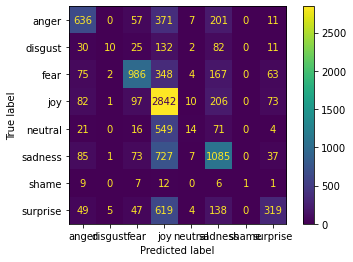

In [53]:
# Plot confusion matrix
plot_confusion_matrix(nb_model, X_test, y_test)

<h3> Save model <h3>

In [54]:
import joblib

In [55]:
model_file = open("Emotion_classifier_NB_Model.pkl", "wb")
joblib.dump(nb_model, model_file)
model_file.close()

### Model Interpretation

+ Eli5
+ Lime
+ Shap

In [56]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

e:\python 3.9\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
# Accuracy
lr_model.score(X_test, y_test)

0.6215750143705691

In [58]:
# Single prediction
predict_emotion(sample_text, lr_model)

Prediction:joy, Prediction Score:0.556061947507604


{'anger': 0.08250929258095802,
 'disgust': 0.012026856283070599,
 'fear': 0.04463048069647399,
 'joy': 0.556061947507604,
 'neutral': 0.06879674824883589,
 'sadness': 0.07840465543184928,
 'shame': 0.001304548048404537,
 'surprise': 0.15626547120280368}

In [59]:
# Interpret the model
import eli5

In [60]:
# Show the weights for each class/label
eli5.show_weights(lr_model, top=20)

In [61]:
class_names = ylabels.unique().tolist()

In [63]:
feature_names = cv.get_feature_names()

In [64]:
eli5.show_weights(lr_model, feature_names=feature_names, target_names=class_names)